### Imports

In [885]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## PART 2 of Allurion case study, by Juan Lopez

### A) Analysis based on accounts specialty




### Loading data

In [886]:
filepath = '/Users/juansmacbook/Desktop/Allurionproject/Part_2_Case_Study_Data_Inputs_v2.0.xlsb'
data_a = pd.read_excel(filepath, header=14, usecols="C:AE", sheet_name='Exercise_a')
data_b = pd.read_excel(filepath, header=14, usecols="C:G",sheet_name='Exercise_b', parse_dates=['Responded_at'])
""" I will quickly rename the columns """

data_b.rename(columns={'1. How likely are you to recommend the Allurion program on a scale from 0 to 10?': "score"}, inplace=True)

new_column_names=['Country', 'Region', 'Market type', 'Main Account Name\n(Anonymized)','Segmentation final', 'Specialty', 'Opening date of the account','1_2017','2_2017','3_2017','4_2017','1_2018','2_2018','3_2018','4_2018','1_2019','2_2019','3_2019','4_2019','1_2020','2_2020','3_2020','4_2020','1_2021','2_2021','3_2021','4_2021','1_2022','quarter dates']

data_a.columns=new_column_names
data_a['Opening date of the account']=data_a['quarter dates']
data_a=data_a.drop(['quarter dates'],axis=1)


In [888]:
""" Let's do value counts of specialities"""
data_a['Specialty'].value_counts()

-                                           564
Core - Bariatric Surgeon                    277
Core - Unknown to date                      115
Core - Gastroenterologist / Endoscopist      70
Non-core Aesthetics                          55
Multispecialty (incl. Core and Non-Core)     32
Other Non-Core (nutritionists etc.)          16
Non-core - Unknown to date                    8
Core - Both Bariatric and Gastro/ Endo        1
Name: Specialty, dtype: int64

In [889]:
''' Let's map the specialities to their categories'''

def map_speciality(speciality):

    if 'Multispecialty' in speciality: return 'Multispecialty'
    elif ('Non-core' in speciality) or ('Non-Core' in speciality): return 'Non-Core'
    elif 'Core' in speciality: return  'Core'
    else: return speciality

""" Let's apply the function """

data_a['Specialty']=data_a['Specialty'].apply(lambda x: map_speciality(x))
data_a['Specialty'].value_counts()

-                 564
Core              463
Non-Core           79
Multispecialty     32
Name: Specialty, dtype: int64

In [890]:
""" Let's take filter out the rows that dont have specialities"""
data_a=data_a.loc[data_a['Specialty']!='-']
data_a['Specialty'].value_counts()

Core              463
Non-Core           79
Multispecialty     32
Name: Specialty, dtype: int64

In [891]:
"""Now let's check the sale of every type of speciality"""

columns=data_a.columns[7:]

sales_Core=data_a.loc[data_a['Specialty']=='Core'][columns].sum(axis=0)
sales_Non_Core=data_a.loc[data_a['Specialty']=='Non-Core'][columns].sum(axis=0)
sales_Multispecialty=data_a.loc[data_a['Specialty']=='Multispecialty'][columns].sum(axis=0)

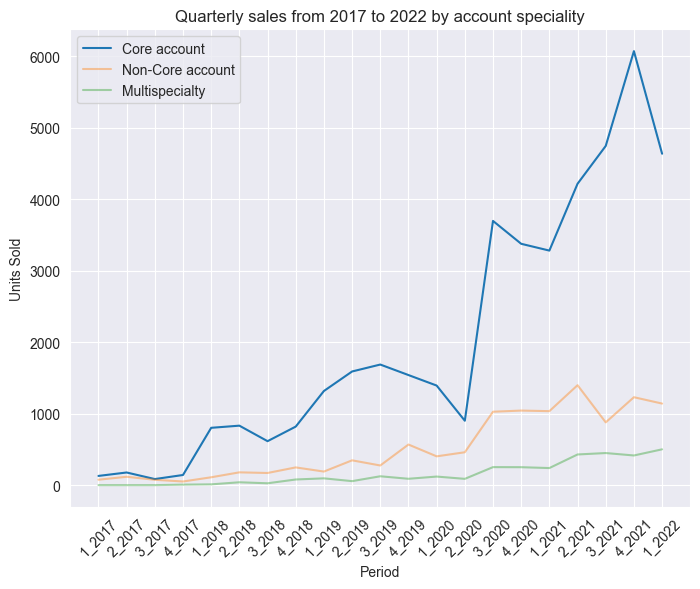

In [892]:
plt.figure(figsize=(8,6.2))
plt.title('Quarterly sales from 2017 to 2022 by account speciality')
sns.lineplot(sales_Core,label='Core account')
sns.lineplot(sales_Non_Core, label='Non-Core account', alpha=0.4)
sns.lineplot(sales_Multispecialty, label='Multispecialty', alpha=0.4)

plt.xlabel('Period')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.savefig('graph1.pdf',transparent=True)

In [893]:
sales_Core
sales_Non_Core
sales_Multispecialty
sales_total=sales_Core+sales_Non_Core+sales_Multispecialty

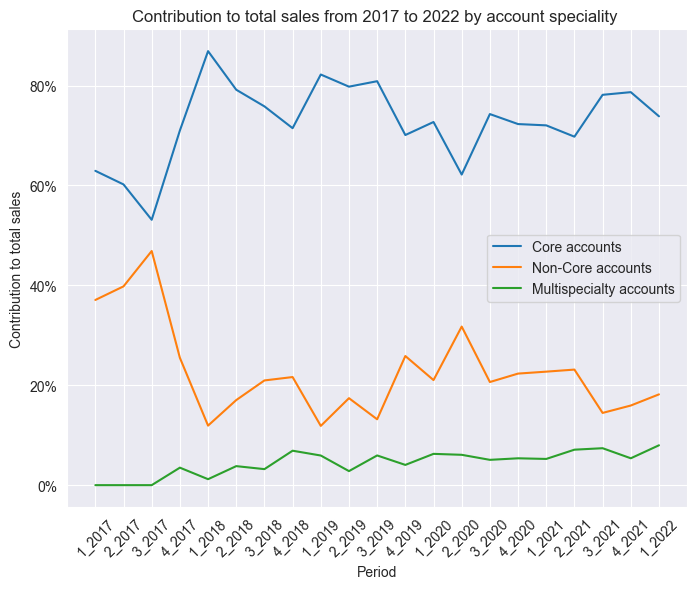

In [894]:
import matplotlib.ticker as mtick


plt.figure(figsize=(8,6.2))
plt.title('Contribution to total sales from 2017 to 2022 by account speciality ')
sns.lineplot(1*sales_Core/sales_total, label='Core accounts')
sns.lineplot(1*sales_Non_Core/sales_total, label='Non-Core accounts')
sns.lineplot(1*sales_Multispecialty/sales_total, label='Multispecialty accounts')
plt.xlabel('Period')
plt.ylabel('Contribution to total sales')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.savefig('graph3.pdf',transparent=True)

In [895]:
""" We are going to check how the current number of professionals in each quarter """
data_with_dates=data_a.loc[data_a['Opening date of the account']!='-']

In [896]:
important_cols=['Specialty','Opening date of the account']+columns.to_list()

In [897]:

specialty =['Core','None-Core','Multispecialty']

date_count=data_with_dates[data_with_dates['Specialty']==specialty[0]]['Opening date of the account'].value_counts()
newcomers_core=[]
for index in data_a.columns[7:].to_numpy():
    if index in date_count.index.to_numpy():
            newcomers_core.append(date_count[index])
    else:
        newcomers_core.append(0)
date_count=data_with_dates[data_with_dates['Specialty']==specialty[1]]['Opening date of the account'].value_counts()
newcomers_non_core=[]
for index in data_a.columns[7:].to_numpy():
    if index in date_count.index.to_numpy():
            newcomers_non_core.append(date_count[index])
    else:
        newcomers_non_core.append(0)

date_count=data_with_dates[data_with_dates['Specialty']==specialty[2]]['Opening date of the account'].value_counts()
newcomers_multi=[]
for index in data_a.columns[7:].to_numpy():
    if index in date_count.index.to_numpy():
            newcomers_multi.append(date_count[index])
    else:
        newcomers_multi.append(0)


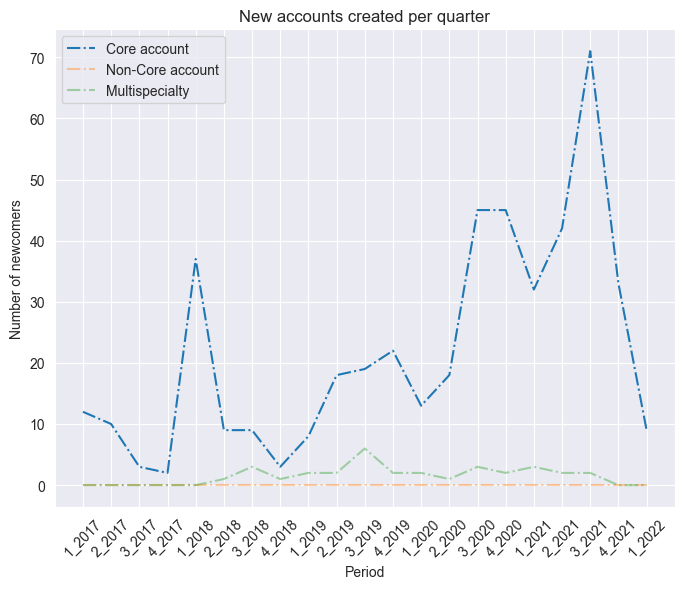

In [898]:
plt.figure(figsize=(8,6.2))
plt.title('New accounts created per quarter')
sns.lineplot(pd.Series(data=newcomers_core,index=data_a.columns[7:],name='Core'), label='Core account', linestyle='dashdot')
sns.lineplot(pd.Series(data=newcomers_non_core,index=data_a.columns[7:],name='Non-Core'), label='Non-Core account', alpha=0.4,linestyle='dashdot')
sns.lineplot(pd.Series(data=newcomers_multi,index=data_a.columns[7:],name='Multispecialty'), label='Multispecialty', alpha=0.4,linestyle='dashdot')
plt.xlabel('Period')
plt.ylabel('Number of newcomers')
plt.xticks(rotation=45)

plt.savefig('graph2.pdf',transparent=True)

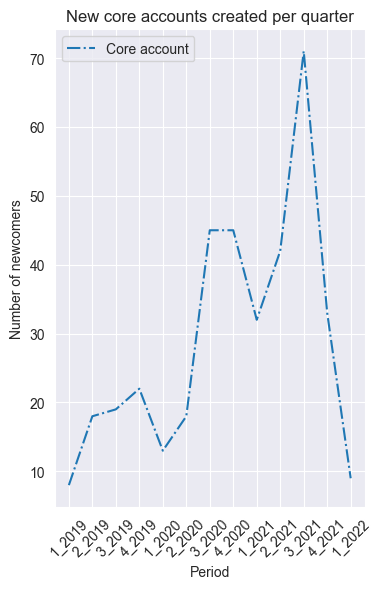

In [899]:

plt.figure(figsize=(4,6.2))
plt.title('New core accounts created per quarter')
sns.lineplot(pd.Series(data=newcomers_core,index=data_a.columns[7:],name='Core')[8:], label='Core account', linestyle='dashdot')
plt.xlabel('Period')
plt.ylabel('Number of newcomers')
plt.xticks(rotation=45)
plt.savefig('graph4.pdf',transparent=True)


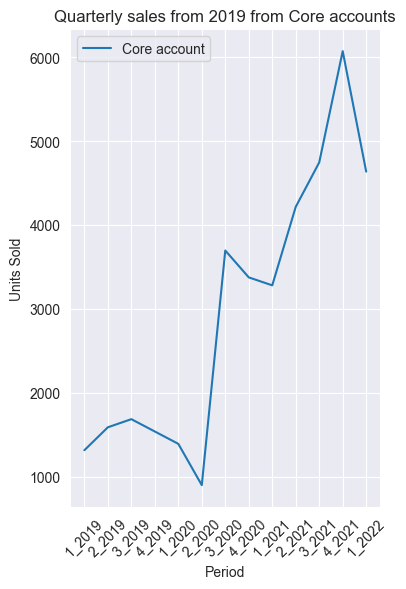

In [900]:
plt.figure(figsize=(4,6.2))
plt.title('Quarterly sales from 2019 from Core accounts')
sns.lineplot(sales_Core[8:],label='Core account')
plt.xlabel('Period')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.savefig('graph5.pdf',transparent=True)

### B) Analysis of our patient satisfaction based on NPS methodology (Net Promoter Score)

####  TASK 1: Showing our overall patient satisfaction via the NPS methodology:
for this part we just need to calculate the overall NPS score using all the data. We just need to separate promoters (score 9 and 10), passives (scores 7 and 8), and detractors (scores of 6 or below).


In [901]:
promoters=data_b.loc[data_b['score']>=9]
detractors=data_b.loc[data_b['score']<=6]

In [902]:
NPS_score=(100*promoters.shape[0]/data_b.shape[0]) - (100*detractors.shape[0]/data_b.shape[0])
print('The overall NPS score is: '+str(NPS_score))

The overall NPS score is: 24.98216486153447


#### TASK 2: Show the NPS evolution over the months that make sense



In [903]:
""" Let's extract the month and year data and put them into two separate columns """
data_b['month']=data_b['Responded_at'].apply(lambda x: x.month)
data_b['year']=data_b['Responded_at'].apply(lambda x: x.year)

In [904]:
""" We are going to group by year and by month to inspect them"""
data_to_group=data_b[['year','month','score']]
data_to_group.groupby(['year','month']).describe()

score                                                
             count      mean       std  min  25%   50%   75%   max
year month                                                        
2021 6         3.0  6.666667  5.773503  0.0  5.0  10.0  10.0  10.0
     7       480.0  7.333333  3.330966  0.0  6.0   9.0  10.0  10.0
     8      2991.0  7.452357  3.210714  0.0  6.0   9.0  10.0  10.0
     9      3052.0  7.457405  3.261842  0.0  6.0   9.0  10.0  10.0
     10     3323.0  7.496539  3.221724  0.0  6.0   9.0  10.0  10.0
     11     3086.0  7.444264  3.287514  0.0  6.0   9.0  10.0  10.0
     12     2479.0  7.503025  3.297939  0.0  6.0   9.0  10.0  10.0
2022 1         5.0  7.000000  4.472136  0.0  5.0  10.0  10.0  10.0

#### As we can see, we only have to worry about 8 months in total! That makes it so much easier for us, because with short for loop we can calculate every NPS score


In [905]:
""" Since the months dont repeat themselves we can iterate over them if we save them into a list!"""
list_months = [6,7,8,9,10,11,12,1]

monthly_NPS_score=[]

for month in list_months:
    df=data_b.loc[data_b['month']==month]
    promoters=df.loc[df['score']>=9]
    detractors=df.loc[df['score']<=6]
    monthly_NPS_score.append((100*promoters.shape[0]/df.shape[0]) - (100*detractors.shape[0]/df.shape[0]))
"""let's take a look at the NPS scores we just calculated"""
print(monthly_NPS_score)

[33.333333333333336, 19.999999999999996, 23.570712136409227, 25.131061598951504, 25.33854950346073, 25.081011017498376, 26.865671641791046, 20.0]


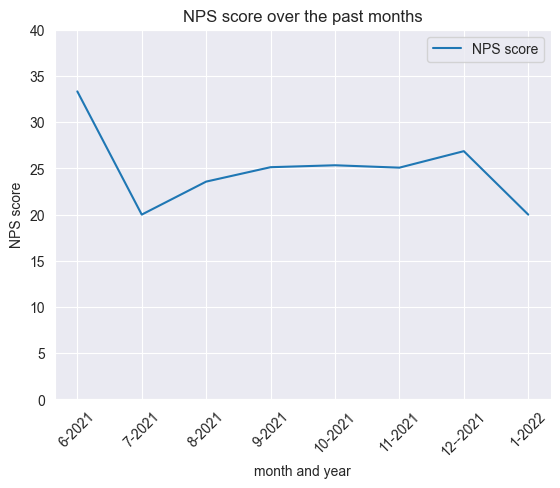

In [906]:
"""Let's plot them"""
list_months_with_names = ['6-2021','7-2021','8-2021','9-2021','10-2021','11-2021','12--2021','1-2022']

plt.figure()
plt.title('NPS score over the past months')
sns.lineplot(pd.Series(data=monthly_NPS_score,index=list_months_with_names), label='NPS score')
plt.xlabel('month and year')
plt.ylabel('NPS score')
plt.ylim([0, 40])
plt.xticks(rotation=45)
plt.savefig('graph6.pdf', transparent=True)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14')])

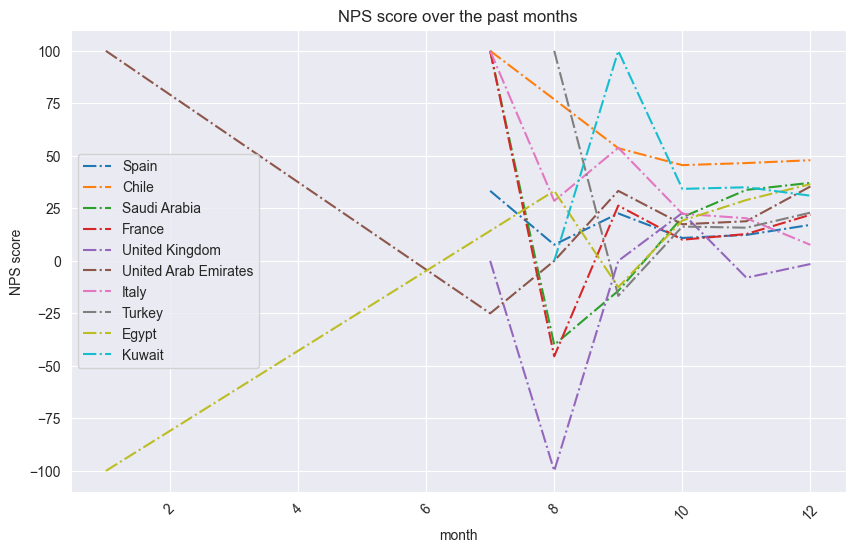

In [907]:


""" Since the months dont repeat themselves we can iterate over them if we save them into a list!"""
top_markets = ['Spain', 'Chile', 'Saudi Arabia', 'France', 'United Kingdom', 'United Arab Emirates', 'Italy', 'Turkey', 'Egypt', 'Kuwait']
list_months_with_names = ['6-2021','7-2021','8-2021','9-2021','10-2021','11-2021','12--2021','1-2022']
list_months = [6,7,8,9,10,11,12,1]
plt.figure(figsize=(10,6))
plt.title('NPS score over the past months')

plt.xlabel('month')
plt.ylabel('NPS score')
for country in top_markets:
    current_df=data_b.loc[data_b['Country ']==country]
    monthly_NPS_score=[]
    months_found=[]
    for month in list_months:

        df=current_df.loc[current_df['month']==month]
        if df.shape[0]!=0:
            promoters=df.loc[df['score']>=9]
            detractors=df.loc[df['score']<=6]
            monthly_NPS_score.append((100*(promoters.shape[0]-detractors.shape[0])/(df.shape[0])))
            months_found.append(month)
        else:
            pass
    sns.lineplot(pd.Series(data=monthly_NPS_score,index=months_found), label=country, linestyle='dashdot')




plt.savefig('graph7.pdf', transparent=True)
plt.xticks(rotation=45)